# Projeto 2- Ciência dos Dados 2021.2

### Integrantes: Fabio Ferreira; Guillermo Kuznietz; Livia Brigido.

# Ideia Inicial: 

#### Ideia de um país bem desenvolvido é normalmente ligada diretamente com o conceito de uma sociedade bem organizada, com grandes desenvolvimentos tecnológicos e científicos, além de possivelmente ser exemplo em áreas como política, saúde e educação. Mas e o emocional também entra nesse quesito? Uma pergunta visivelmente bem abstrata, mas que já vem sendo abordada pelo Desenvolvimento Sustentável da ONU desde os anos 70.

#### O Relatório Mundial da Felicidade teve sua primeira versão lançada em 2012 com a presença de especialistas multidisciplinares, levando em conta a economia, psicologia, análise de pesquisa, estatísticas nacionais, entre outros. Sobre a pesquisa: "Os dados são coletados de pessoas em mais de 150 países. Cada variável mensurada revela uma pontução média ponderada por população numa escala de 0 a 10, que é monitorada com o passar do tempo e comparada com a de outros países. Atualmente, essas variáveis incluem: PIB per capita real, assistência social, expectativa de vida saudável, liberdade para fazer escolhas, generosidade e percepções de corrupção. Cada país também é comparado a um país hipotético chamado Distopia. Distopia representa as menores médias nacionais para cada variável chave e, juntamente com erros residuais, é usado como ponto de referência de regressão."

#### Dessa Forma, a equipe teve como objetivo analisar essa base de dados, considerando um período sem grandes impactos mundiais, como a pandemia que passamos atualmente, e enxergar as relações entre os dados obtidos. Assim, entender quais critérios mantém correlações mais fortes com o índice estudado. Os dados escolhidos, portanto, foram os do ano de 2019.

## Definição do problema:

### Predição de quão feliz é uma população a partir de índices como saúde, família, PIB e nível de corrupção :) 

In [1]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\liviabn\Documents\Cdados- Projetos\P2Cdados2021_2\Projeto2_CienciaDados


## Carregando bibliotecas necessárias para a análise dos dados:

In [2]:
%matplotlib inline
import pandas as pd
from scipy.stats import norm, probplot

import numpy as np
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

## 1. Manipulando a base de dados:

In [3]:
#Lendo a base de dados
data19= pd.read_csv("2019.csv")
data19

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Legenda: A base de dados acima foi obtida através da plataforma Kaggle.com, disponível no link: https://www.kaggle.com/mathurinache/world-happiness-report-20152021

### Sobre a base de dados:
A base de dados é o local em que todas as informações utilizadas nas nossas análises ficam armazenadas. 

##### As colunas presentes contém as seguintes informações, respectivamente:

#### GDP per capita:
O GDP per capita é o PIB da nação dividido pelo número de habitantes. Ele é medido em dólares e não possui nenhuma escala específica de marcação.

#### Social support:
A assistência social inclui políticas e redes de apoio social, que tem como objetivo objetivo garantir a proteção social aos cidadãos, ou seja, apoio a indivíduos, famílias e à comunidade no enfrentamento de suas dificuldades, por meio de serviços, benefícios, programas e projetos. A escala de medição vai de 0 a 1.6, sendo 0 o pior índice e 1.6 o melhor índice.


#### Healthy life expectancy:
Expectativa de vida, também chamada de esperança de vida, é o número médio de anos que a população de um país pode esperar viver, caso sejam mantidas as mesmas condições de vida vivenciadas no momento do nascimento. A expectativa de vida está bastante relacionada com a qualidade de vida que um país possui. Seu valor máximo encontrado foi de 1.141, sendo que, quanto maior, maior a expectativa.

#### Freedom to make life choices:
Liberdade de expressão, medida em uma escala de 0 a 1. Quanto maior, maior a liberdade.


#### Generosity:
O índice de generosidade avalia o grau de envolvimento da população em ações de caridade, medida em uma escala de 0 a 1.

#### Perceptions of corruption:
O índice de percepção da corrupção nos fornece um panorama sobre o quão corrupto um país é, sendo o principal indicador de corrupção mundial. É medido numa escala de 0 a 0.5, e quanto maior for, maior a percepção da população de que o governo local é corrupto.


## Limpeza e Análise exploratória

Com os dados em mãos, podemos manuseá-los a fim de evitarmos qualquer imprevisto futuro relacionada à própria base, como, por exemplo, linhas em branco. Abaixo, foram realizadas duas etapas para isso: Encontrá-las e, se necessário, retirá-las.

In [4]:
#Confirmando que nossa base de dados não tem nenhuma linha (país/região) com dados faltando
data19.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [5]:
#Caso tivesse realmente alguma, era possível utilizar a função abaixo:
data19 = data19.dropna()

## Técnica escolhida: REGRESSÃO

#### Durante as aulas, tivemos contato com duas formas: Regressão e Classificação.  Em poucas palavras, a classificação normalmente é utilizada para contextos onde há a possibilidade de utilizar rótulos discretos como: Grávida, não gravida; Triste, feliz, indiferente; Relevante, irrelevante, muito relevante, muito irrelevante... 

#### Diferente da anterior, a regressão volta-se principalmente para dados numéricos, dados de entrada para valores que estão inseridos em reais e contínuos. Se em uma classificação o objetivo era descobrir se uma pessoa está grávida ou não, a regressão poderia seguir o caminho de descobrir a probabilidade disso acontecer. Como são caracteristicas presentes na base de dados escolhida, será o modelo abordado daqui em diante.

Abaixo o objetivo foi preparar a base de dados para que não ocorresse nenhum problema com os modelos de regressão que serão utilizados posteriormente. A conclusão encontrada foi retirar duas colunas em específico: Overall Rank-- Intimamente ligada ao score de felicidade, o que não deixa motivos para analisar a relação entre a target e esse dado; Country or region-- Uma coluna não numérica. OBSERVAÇÃO: É importante salientar que há a possibilidade de manuseá-la a fim de que seja possível "torná-la numérica" e assim utilizá-la também como feature (Exemplo: Ver a relação entre a região que o país se encontra e o nível de felicidade). Por questões de simplificação, não foi requerida.

In [6]:
# Como o overall rank é uma outra forma de representar o score, só que baseando-se em posições:
data19_H=data19.drop(columns=["Overall rank"])

#Como nossa análise númerica
data19_H= data19_H.drop(columns=["Country or region"])

Para termos uma noção de como esses dados numéricos estão distribuidos, realizaremos uma análise numérica. 

In [7]:
data19_H.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Legenda: Análise numérica, levando em conta: Contagem total, média, desvio padrão, valor mínimo, alguns percentis e valor máximo.

In [8]:
#Renomeando para facilitar a leitura:

data19_H= data19_H.rename(columns={"Score":"Happiness Score"})
data19_H

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


### Primeira análise: Features, Targets e relações entre ambos

#### Target-- Happiness Score
Definição:Taxa de felicidade da população de determinado país

#### Features-- GDP per capita,	Social support,	Healthy life expectancy,	Freedom to make life choices,	Generosity	Perceptions of corruption.
Definição:Fatores secundários que afetam no nosso target (Hapiness Score)

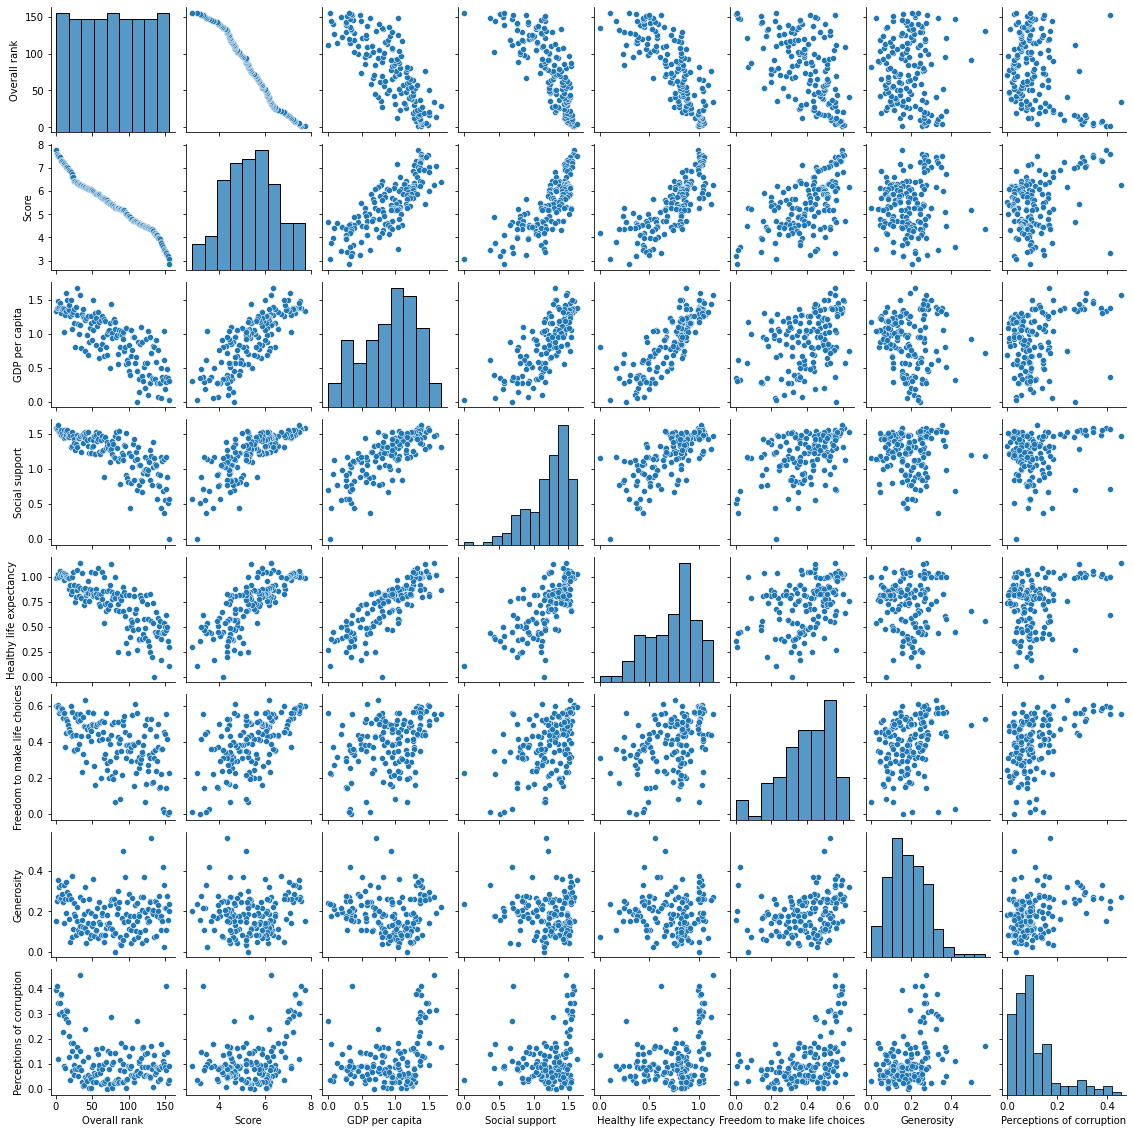

In [9]:
import seaborn as sns
sns.pairplot(data19, height=2);

In [10]:
#O que são nossas features e o nosso target:
X = data19_H[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption']]
y = data19_H['Happiness Score']


In [11]:
def regress(y,X):
    
    X_cp = sm.add_constant(X)
    model = sm.OLS(y,X_cp)
    results = model.fit()
    
    return results

results = regress(y,X)
results.summary()

#Desde já, conseguimos analisar se as features se comportam como imaginado pela hipótese inicial: Não influenciam na felicidade
#OBS: Levando em conta um alpha padrão de 10%, já é possível analisar quem será descartado.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           2.40e-46
Time:                        20:20:55   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.7952      0.211      8.505      0.000       1.378       2.212
GDP per capita                   0.7754      0.218      3.553      0.001       0.344       1.207
Social support                   1.1242      0.237      4.745      0.000       0.656       1.592
Healthy life expectancy          1.0781      0.335      3.223      0.002       0.417       1.739
Freedom to make life choices     1.4548      0.375      3.876      0.000       0.713       2.197
Generosity                       0.4898      0.498      0.984      0.327      -0.494       1.473
Perceptions of corruption        0.9723      0.542      1.793      0.075      -0.099       2.044
==============================================================================
Omnibus:                        8.188   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.971
Skew:                          -0.498   Prob(JB):                       0.0186
Kurtosis:                       3.483   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A partir da observação da tabela acima, iremos continuar o processo de limpeza/manuseo analisando o P> t. 

Imaginemos que temos como hipótese inicial um contexto onde nenhuma das features tem relação com nossa target (Ou irrelevante relação). Para isso, precisamos definir um nível de significância 𝛼 . Por padrão, esse valor escolhido foi o de 10%. Podemos definir que, caso apresentar valor-p menor do que o  𝛼  adotado, nossa hipótese será descartada, ou seja, a relação que procurávamos foi descartada.

Conclusão: Uma das colunas será retirada

In [12]:
# Backward Stepwise-- Após retirar Generosity
X = data19_H[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']]
Y = data19_H['Happiness Score']

results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     105.0
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           3.59e-47
Time:                        20:20:55   Log-Likelihood:                -120.27
No. Observations:                 156   AIC:                             252.5
Df Residuals:                     150   BIC:                             270.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.8689      0.197      9.471      0.000       1.479       2.259
GDP per capita                   0.7455      0.216      3.450      0.001       0.319       1.172
Social support                   1.1180      0.237      4.722      0.000       0.650       1.586
Healthy life expectancy          1.0840      0.334      3.241      0.001       0.423       1.745
Freedom to make life choices     1.5340      0.367      4.185      0.000       0.810       2.258
Perceptions of corruption        1.1176      0.522      2.142      0.034       0.086       2.149
==============================================================================
Omnibus:                        9.283   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.278
Skew:                          -0.527   Prob(JB):                      0.00967
Kurtosis:                       3.562   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

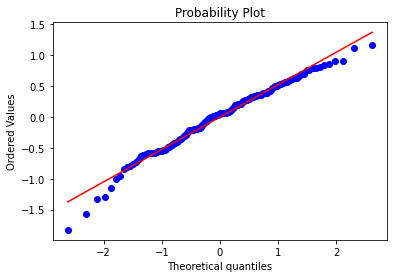

In [13]:
#Saindo do "previsto"-- residuos: Variação média dos meus resultados
probplot(results.resid, dist="norm", plot= plt);

Text(0, 0.5, 'Percentis dos resíduos')

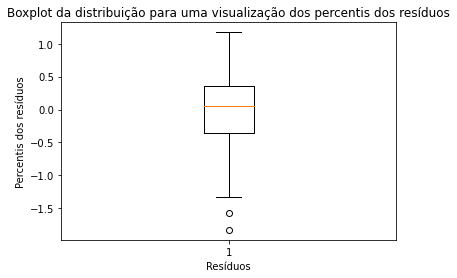

In [14]:
#outliers
plt.boxplot(results.resid); #Probabilidade Vs Quartis teóricos
plt.title('Boxplot da distribuição para uma visualização dos percentis dos resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Percentis dos resíduos')

In [15]:
#Paises abaixo da media 
print(np.where(results.resid<-1.5))

(array([147, 151], dtype=int64),)


In [16]:
data19.loc[147,:]

Overall rank                         148
Country or region               Botswana
Score                              3.488
GDP per capita                     1.041
Social support                     1.145
Healthy life expectancy            0.538
Freedom to make life choices       0.455
Generosity                         0.025
Perceptions of corruption            0.1
Name: 147, dtype: object

In [17]:
data19.loc[151,:]

Overall rank                       152
Country or region               Rwanda
Score                            3.334
GDP per capita                   0.359
Social support                   0.711
Healthy life expectancy          0.614
Freedom to make life choices     0.555
Generosity                       0.217
Perceptions of corruption        0.411
Name: 151, dtype: object

### Retirar, ou não retirá-los: 
Importante salientar que, por mais que seja um outlier, não é correto retirá-los sem justificativas concretas. O risco que corremos, dessa forma, é enviesar o estudo e, consequentemente, obter resultados que não refletem a realidade. Os mesmos que podem parecer "pontos fora da tangente", podem muito bem refletirem "desvios" que estão conforme o real.

Sobre os dois países acima, há o fato de apresentarem alguns problemas com governos não totalmente transparentes e, relacionando com os aspectos que estão sendo estudados, reconhece a grande possibilidade disso influenciar na característica de outlier.

### Adicional- Caso quiséssemos analisar de outra maneira...

O que utilizamos acima foram os resíduos, coisa que já conseguimos através da função. Porém esse processo poderia também ser realizado, de uma forma um pouco mais complexa, analisando cada feature por vez. O método abaixo não foi utilizado, mas poderia ser facilmente empregado. Note que um dos países que retiramos acima aparece também nesse caso.

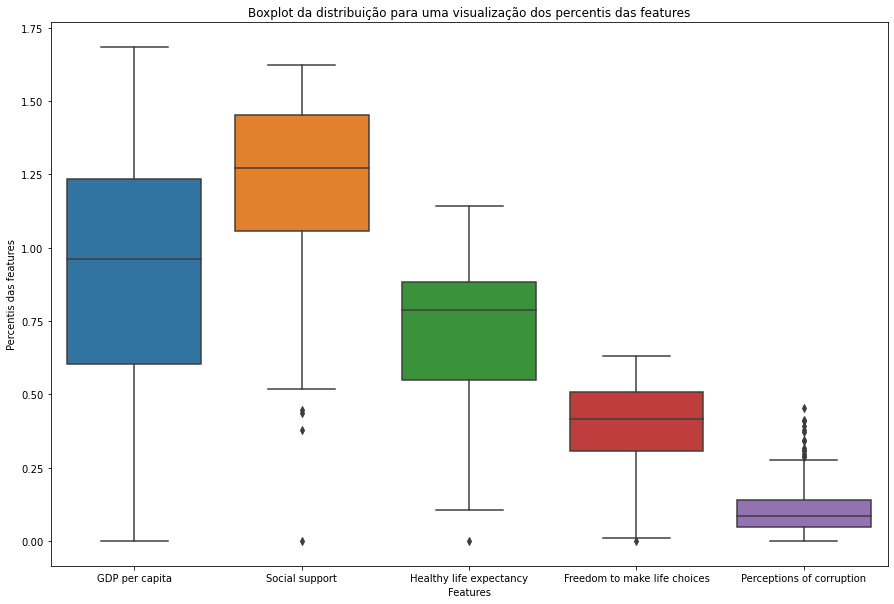

In [18]:
#Gráfico dos outliers separados por cada feature
features=['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']
plt.figure(figsize=(15, 10))
sns.boxplot(data=data19[features])
plt.title('Boxplot da distribuição para uma visualização dos percentis das features')
plt.xlabel('Features')
plt.ylabel('Percentis das features')
plt.show()

In [19]:
#Países com suporte social abaixo da média 
print(np.where(data19_H["Social support"]<0.5))

(array([101, 144, 148, 154], dtype=int64),)


In [20]:
data19.loc[[101,144,148,154],:]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
101,102,Benin,4.883,0.393,0.437,0.397,0.349,0.175,0.082
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [21]:
#Países com expectativa de vida abaixo da média 
print(np.where(data19_H["Healthy life expectancy"]<0.1))

(array([134], dtype=int64),)


In [22]:
data19.loc[[134],:]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
134,135,Swaziland,4.212,0.811,1.149,0.0,0.313,0.074,0.135


In [23]:
#Países com percepção de corrupção acima da média 
print(np.where(data19_H["Perceptions of corruption"]>0.35))

(array([  0,   1,   6,   7,  33, 151], dtype=int64),)


In [24]:
data19.loc[[0, 1, 6, 7, 33, 151],:]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411


## Modelos preditivos

##### Após o preparo dos dados, há a necessidade de utilizar diferentes formas para manuseá-los. Vale lembrar que anteriormente já estávamos utilizando a regressão linear. Além da necessidade de analisar quais se mostram mais edequados para a predição, há também a possibilidade de discutir sobre como alguns dos vários modelos existentes funcionam.

### Como iremos compará-los? 
O desempenho de cada um pode ser visualizado de diferentes formas. Uma delas é analisando algumas caracteristicas dos resultados da própria aplicação, sendo algumas delas:

#### Coeficiente de determinação (R2):
O coeficiente de determinação é uma medida de ajuste de um modelo estatístico linear generalizado, como a regressão linear simples ou múltipla, aos valores observados de uma variável aleatória. Ela varia entre 0 e 1, podendo ser expresso tambem em termos percentuais.

#### Erro médio absoluto (mae):
O Erro Absoluto Médio consiste na média das distâncias entre valores preditos e reais. Diferentemente do MSE e do RMSE, essa métrica não inflige tão severamente os outliers do modelo.

#### Erro quadrático médio (mse):
O erro quadrático médio é uma medida de como o retorno de um fundo se afasta do retorno da referência. Quanto maior o erro quadrático médio, maior o afastamento entre o retorno do fundo e o retorno da referência e virce-versa.

#### Erro quadrático médio ao quadrado (rmse):
O RMSE mede a diferença entre os valores previstos pelo modelo e os valores observados. Pode ser considerado como o "desvio padrão dos erros".


### 1. Regressão Linear
Regressão linear é uma técnica estatística usada para analisar a relação entre uma única
variável a ser explicada e um conjunto de outras variáveis explicativas.
A variável explicada também recebe o nome de variável dependente, e as variáveis
explicativas também são chamadas de variáveis independentes.

A regressão linear simples usa variáveis independentes (x) para explicar ou
prever o resultado da variável dependente (Y). Os parametros medem o quanto que uma variação em uma variável X afetam a variável
explicada Y.

In [25]:
from sklearn.model_selection import train_test_split
X = data19_H[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']]
Y = data19_H['Happiness Score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state= 100)

In [26]:
def regress(y,X):
    
    X_cp = sm.add_constant(X)
    model = sm.OLS(y,X_cp)
    results = model.fit()
    
    return results

results = regress(y_train,X_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     86.07
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.06e-37
Time:                        20:20:57   Log-Likelihood:                -93.336
No. Observations:                 124   AIC:                             198.7
Df Residuals:                     118   BIC:                             215.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.8460      0.218      8.462      0.000       1.414       2.278
GDP per capita                   0.5824      0.247      2.353      0.020       0.092       1.073
Social support                   1.2122      0.261      4.646      0.000       0.695       1.729
Healthy life expectancy          1.2471      0.361      3.453      0.001       0.532       1.962
Freedom to make life choices     1.1673      0.402      2.903      0.004       0.371       1.964
Perceptions of corruption        1.7316      0.597      2.899      0.004       0.549       2.914
==============================================================================
Omnibus:                        6.908   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.451
Skew:                          -0.516   Prob(JB):                       0.0397
Kurtosis:                       3.430   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
from sklearn.linear_model import LinearRegression
regressorLinear= LinearRegression()
regressorLinear.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = regressorLinear.predict(X_test)

In [29]:
df_Linear = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df_Linear.head()

,Real Values,Predicted Values
45,6.100,5.379697
11,7.167,6.208431
122,4.466,4.462086
15,7.021,6.986657
127,4.390,4.265631


In [30]:
from sklearn.metrics import r2_score
Rsqrt_Linear = r2_score(y_test, y_pred)
Rsqrt_Linear

0.7337850220148568

In [31]:
from sklearn.metrics import mean_squared_error
mseL= mean_squared_error(y_test, y_pred)
rmseL= mean_squared_error(y_test, y_pred, squared= False)
print(mseL)
print(rmseL)

0.33160261950550224
0.5758494764306921


In [32]:
from sklearn.metrics import mean_absolute_error
maeL= mean_absolute_error(y_test, y_pred)
maeL

0.4259958639196081

### 2. Decision Tree Regression

### Entendendo o processo

A abordagem com a Decisão em árvore pode abranger tanto regressão como classificação, e pode ser dividida em três partes:
Nó raiz, daquele que sai os restantes dos nós e onde se encontram todos os dados, ainda sem nenhuma divisão. Nós interiores, onde começam as divisões, baseadas nas regras de decisões feitas pelo modelo. Por fim, os "nós folhas", os outcomes de fato, ou seja, os resultados obtidos.

<img src="fruit-decision-tree.png" style="height:200px">

Legenda: Exemplo de uma decisão em árvore para decidir a classificação de uma fruta.

Para entender de forma clara como programar esse método, foi feito um teste com apenas uma feature-- GDP per capita. O objetivo é analisar que, diferente do exemplo acima, que muda de "categoria"-- Ex: De amarelo, pode ir para laranja, nossa tentativa abaixo terá como critério uma faixa dos dados. Fazendo uma analogia ao exemplo, poderia ser levado em conta a quantidade de pigmento amarelo em uma fruta (Se pouco, voltar-se para uma fruta vermelha, se muito, frutas verdes ou laranjas).

In [33]:
#Decision Tree Regression:
y = data19_H['Happiness Score'].values
X = data19_H['GDP per capita'].values

#Base de treinamento e teste-- Ver como o modelo irá se sair
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 100)

from sklearn.tree import DecisionTreeRegressor

regressorTeste = DecisionTreeRegressor()

#Treinando o modelo para analisar posteriormente
regressorTeste.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
y_pred_Teste= regressorTeste.predict(X_test.reshape(-1,1))


In [34]:
#Uma das formas de analisar é plotando uma tabela com os valores reais Vs Valores preditados:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred_Teste.reshape(-1)})
df.head()

,Real Values,Predicted Values
0,6.100,4.639
1,7.167,5.191
2,4.466,3.410
3,7.021,6.021
4,4.390,4.534


Assim como utilizamos na regressão linear, poderiamos ter aplicado as variáveis como r2, mae e mse. Como essa etapa foi apenas para exemplificar, a forma escolhida foi visual, com um gráfico.

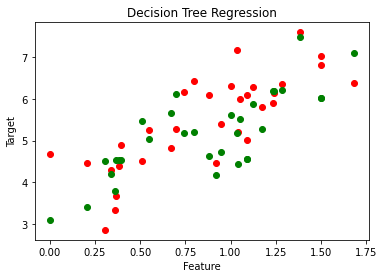

In [35]:
# Visualising the Decision Tree Regression Results 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red', label= "Teste")
plt.scatter(X_test, y_pred_Teste, color = 'green', label="Predição")
plt.title('Decision Tree Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Aplicando de fato:

Após analisar como funciona, aplicaremos para todas as nossas features:

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X = data19_H[['GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Perceptions of corruption']]
y = data19_H['Happiness Score']

X_train_Tree, X_test_Tree, y_train_Tree, y_test_Tree = train_test_split(X, y, test_size = 0.2, random_state= 100)

Colunas= ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']
regr = DecisionTreeRegressor(max_depth=3, random_state=100) #max_depth- Quantas ramificações

regr.fit(X_train_Tree, y_train_Tree) #Dataframe ele já entende como uma matriz

DecisionTreeRegressor(max_depth=3, random_state=100)

In [37]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_0 <= 1.11
|   |--- feature_2 <= 0.65
|   |   |--- feature_1 <= 0.76
|   |   |   |--- value: [3.57]
|   |   |--- feature_1 >  0.76
|   |   |   |--- value: [4.41]
|   |--- feature_2 >  0.65
|   |   |--- feature_1 <= 1.08
|   |   |   |--- value: [4.67]
|   |   |--- feature_1 >  1.08
|   |   |   |--- value: [5.43]
|--- feature_0 >  1.11
|   |--- feature_1 <= 1.45
|   |   |--- feature_3 <= 0.34
|   |   |   |--- value: [5.57]
|   |   |--- feature_3 >  0.34
|   |   |   |--- value: [6.00]
|   |--- feature_1 >  1.45
|   |   |--- feature_4 <= 0.07
|   |   |   |--- value: [6.25]
|   |   |--- feature_4 >  0.07
|   |   |   |--- value: [7.15]



Assim como exemplificado anteriormente, abaixo temos a visualização "em árvore", mas agora com a técnica que escolhemos: A regressão

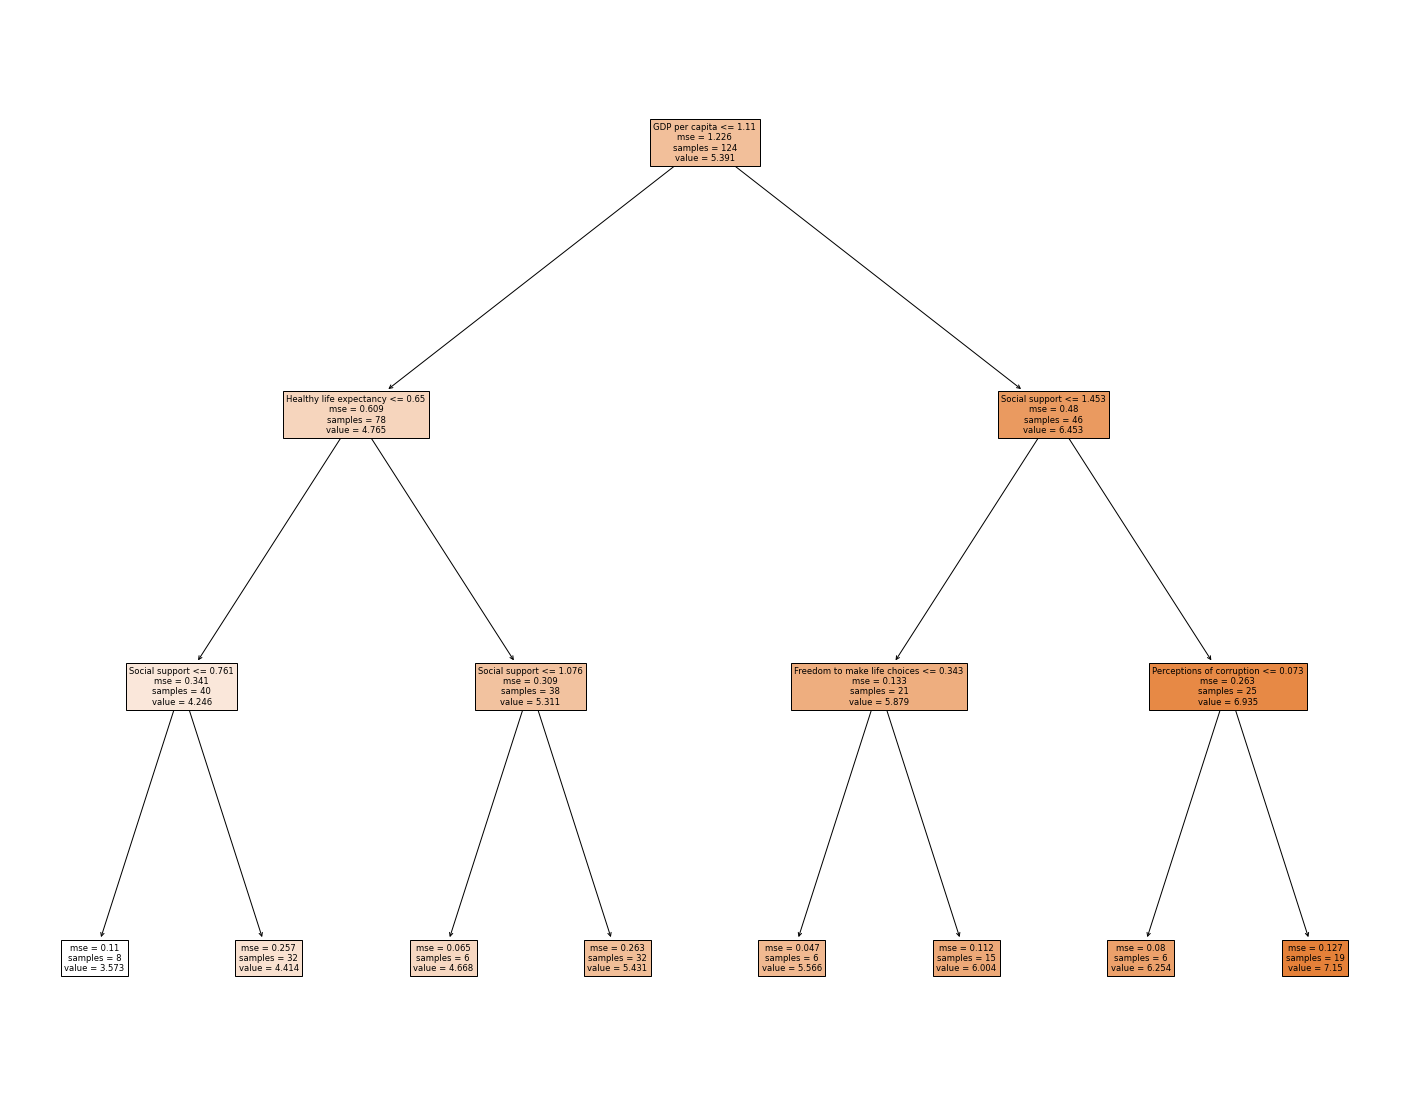

In [38]:
plt.figure(figsize=(25,20))
arvore= tree.plot_tree(regr, feature_names=Colunas, filled=True)
plt.savefig('happyTree.png')

In [39]:
#Utilizando as ramificações que realmente farão sentido para o modelo (Número de features)
regr = DecisionTreeRegressor(max_depth=5, random_state=100) #max_depth- Quantas ramificações
regr.fit(X_train_Tree, y_train_Tree) #Dataframe ele já entende como uma matriz

DecisionTreeRegressor(max_depth=5, random_state=100)

In [40]:
y_pred_Tree = regr.predict(X_test_Tree)

In [41]:
df_Tree = pd.DataFrame({'Real Values':y_test_Tree, 'Predicted Values':y_pred_Tree})
df_Tree.head()

,Real Values,Predicted Values
45,6.100,5.501071
11,7.167,5.501071
122,4.466,4.297083
15,7.021,7.077100
127,4.390,4.297083


In [42]:
from sklearn.metrics import r2_score
Rsqrt_Tree = r2_score(y_test, y_pred_Tree)
Rsqrt_Tree

0.601128996933253

In [43]:
from sklearn.metrics import mean_squared_error
mseT= mean_squared_error(y_test, y_pred_Tree)
rmseT= mean_squared_error(y_test, y_pred_Tree, squared= False)
print(mseT)
print(rmseT)

0.49684157691947006
0.7048699007047117


In [44]:
from sklearn.metrics import mean_absolute_error
maeT= mean_absolute_error(y_test, y_pred_Tree)
maeT

0.5470585164835164

### 3. Random Forest Regression
Random Forest é um método de aprendizado de máquina utilizado para problemas que envolvam classificação ou regressão. Ele se baseia em uma coleção de árvores de decisão em que os são vetores aleatórios independentes e identicamente distribuídos. Podemos pensar em uma árvore de decisão como uma representação gráfica para um determinado processo de decisão. As árvores são formadas por nós, que armazenam informação (perguntas). O nó raiz é o nó que possui maior nível hierárquico e, a partir dele, ramificam-se os nós filhos. O objetivo principal de Random Forest é minimizar o erro de generalização com a menor perda de dados.

In [45]:
from sklearn.ensemble import RandomForestRegressor
X_train_Forest, X_test_Forest, y_train_Forest, y_test_Forest = train_test_split(X, y, test_size = 0.2, random_state= 100)

In [46]:
regressorF = RandomForestRegressor(n_estimators = 10, random_state = 100)
regressorF.fit(X_train_Forest, y_train_Forest);

In [47]:
y_pred_Forest = regressorF.predict(X_test_Forest)
y_pred_Forest

array([5.3572, 5.8369, 4.1228, 7.2415, 4.4745, 3.8975, 4.1194, 7.4833,
       3.7121, 5.7766, 5.5333, 5.8823, 5.4473, 6.5898, 4.5489, 5.2359,
       6.1024, 5.5382, 5.6951, 4.4722, 6.2003, 6.1981, 4.3587, 4.3529,
       6.131 , 3.8118, 4.1451, 6.0655, 6.0558, 5.122 , 4.6698, 5.6363])

In [48]:
X_test_Forest

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
45,0.882,1.232,0.758,0.489,0.006
11,1.034,1.441,0.963,0.558,0.093
122,0.204,0.986,0.390,0.494,0.138
15,1.499,1.553,0.999,0.516,0.310
127,0.385,1.105,0.308,0.327,0.052
111,0.000,0.698,0.268,0.559,0.270
133,0.336,1.033,0.532,0.344,0.100
1,1.383,1.573,0.996,0.592,0.410
101,0.393,0.437,0.397,0.349,0.082
51,1.050,1.409,0.828,0.557,0.028


In [49]:
df = pd.DataFrame({'Real Values':y_test_Forest, 'Predicted Values':y_pred_Forest})
df.head()

,Real Values,Predicted Values
45,6.100,5.3572
11,7.167,5.8369
122,4.466,4.1228
15,7.021,7.2415
127,4.390,4.4745


In [50]:
from sklearn.metrics import r2_score
Rsqrt_Forest = r2_score(y_test, y_pred_Forest)
Rsqrt_Forest

0.7154258297702374

In [51]:
from sklearn.metrics import mean_squared_error
mseF= mean_squared_error(y_test, y_pred_Forest)
rmseF= mean_squared_error(y_test, y_pred_Forest, squared= False)
print(mseF)
print(rmseF)

0.3544711909374999
0.595374832301047


In [52]:
from sklearn.metrics import mean_absolute_error
maeF= mean_absolute_error(y_test, y_pred_Forest)
maeF

0.466465625

## Conclusão:
Por fim, após finalizar os métodos, nosso objetivo final é analisar o desempenho de cada um deles, levando em conta que essa classificação servirá exclusivamente para os dados escolhidos: Happiness Score

In [53]:
data_conclusao = {
        "Regressão Linear": [Rsqrt_Linear,maeL,mseL,rmseL],
        "Regressão Decision Tree":[Rsqrt_Tree,maeT,mseF,rmseF],
        "Regressão Random Forest":[Rsqrt_Forest,maeF,mseF,rmseF]} 

df = pd.DataFrame.from_dict(data_conclusao)
df

,Regressão Linear,Regressão Decision Tree,Regressão Random Forest
0,0.733785,0.601129,0.715426
1,0.425996,0.547059,0.466466
2,0.331603,0.354471,0.354471
3,0.575849,0.595375,0.595375


A partir da observação dessa tabela comparativa, conseguimos concluir rapidamente que o modelo que mais trouxe proximação entre suas predições e os reais valores foi a regressão linear. Mesmo com isso em mente é interessante observar que, quando analisados os dois últimos, fica nítida uma melhora do Decision Tree para o Random Forest e a mesma pode estar intimamente ligada ao funcionamento com etapas adicionais do modelo Random Forest, a partir dos critérios da própria Decision Tree. (Descritas acima)

### E se caso surgisse um novo país, qual seria o score de felicidade dele?

Para concluir nosso aprendizado nesse projeto, voltamos na situação problema dita no inicio: Predição de quão feliz é uma população a partir de índices como saúde, família, PIB e nível de corrupção. 

Imaginando uma população (Humana ou extraterrestre, quem sabe) da qual sabemos os valores das features sendo: (Decididos aleatóriamente)

GDP per capita- 0.684

Social support- 1.0

Healthy life expectancy- 0.5

Freedom to make life choices- 0.378

Perceptions of corruption- 0.29

In [58]:
#Bem, seguindo nosso modelo com melhor desempenho, a regressão linear
data_conclusao = {
        "GDP per capita": [0.684],
        "Social support":[1.0],
        "Healthy life expectancy":[0.5],
        "Freedom to make life choices":[0.378],
        "Perceptions of corruption": [0.29]} 

df = pd.DataFrame.from_dict(data_conclusao)
df
y = regressorLinear.predict(df)
print("O nível de felicidade nessa sociedade foi de : {0} de 10! iee :)".format(y))

O nível de felicidade nessa sociedade foi de : [5.0236012] de 10! iee :)


## Bibliografia:

Codigo de ajuda pandas:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

Tipos de análise de regressão:
https://favtutor.com/blogs/types-of-regression

Gráfico box-plot:
https://comunidade.ceodofuturo.org.br/blog/analise-de-dados-o-grafico-box-plot?gclid=CjwKCAiAv_KMBhAzEiwAs-rX1L6Okk54At9PDGX9zgj8YHthxIueC1tXPUWzt7lI_dh-fHXfkTXODhoC37IQAvD_BwE

Tree Regression:
https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda

Visualize a Decision Tree:
https://mljar.com/blog/visualize-decision-tree/

Random Forests:
http://www.barbon.com.br/wp-content/uploads/2016/04/FundamentosInteligenciaArtificial-3.pdf

sklearn.metrics - mean_squared_error e r2_score (respectivamente)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

Modos de avaliar modelo de regressão
https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b